

# Project: No Show Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>In this project,the dataset shows information collected from 100k medical appointments in Brazil and analyzes whether or not patients show up for their appointment. A number of attributes about the patient are available in each row.

‘ScheduledDay’ - what day the patient set up their appointment.
‘Neighborhood’ - the location of the hospital.
‘Scholarship’ - shows if the patient is enrolled in Brasilian welfare program Bolsa Família or not.
The meaning of the other column names are also literal.


### Question(s) for Analysis
> What factors determine whether a patient will show up for a scheduled appointment or not?



In [1]:
#load packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



In [3]:
# load dataset
df = pd.read_csv('noshowappointments_data.csv')

# view dataset
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The code above imports the data needed and displays a few of the rows and columns.

In [4]:
# check for duplicates and return sum
sum(df.duplicated())

0

In [5]:
# displays statistical data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# makes the negative values of age and waitdays positive
df['Age']=df['Age'].abs()

# display statistical data again
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088892,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110176,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# displays number of rows and columns
df.shape

(110527, 14)

In [8]:
# prints information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data wrangling summary
The data wrangling section contains code that displays general information about the loaded dataset. The number of rows and columns, some statistical data, etc. This is all to ascertain which parts of the data need to be cleaned. 



## Data Cleaning

 

In [9]:
# eliminates 'PatientId' and 'AppointmentID'
df.drop(['PatientId', 'AppointmentID'], axis = 1, inplace = True)

In [10]:
# confirm changes
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# create a function for converting strings to datetime
def convert(name):
     df[name] = pd.to_datetime(df[name]).dt.date.astype('datetime64[ns]')

In [12]:
# converts 'AppointmentDay' data stored as strings to datetime
convert('AppointmentDay')

In [13]:
# converts 'ScheduledDay' data stored as strings to datetime
convert('ScheduledDay')

In [14]:
# rename columns with incorrect names.
df = df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'Noshow'})

In [15]:
# create new column
df['WaitDays'] = (df['AppointmentDay']-df['ScheduledDay']).dt.days

In [16]:
# reaffirm changes
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Noshow,WaitDays
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


### Data cleaning summary
The dataset had to be modified for analysis to be more determinate. 
>##### The columns 'PatientId' and 'AppointmentID' were eliminated as they had no further use for analysis.
>##### The columns 'ScheduledDay' and 'AppointmentDay' which were stored as strings were converted to datetimes for easier working.
>##### Some columns with incorrect names were also corrected.
>##### Additionally, a new column was created using data from 'ScheduledDay' and 'AppointmentDay' to work with called 'WaitDays'.

<a id='eda'></a>
## Exploratory Data Analysis




### Does wait days affect patient noshows?

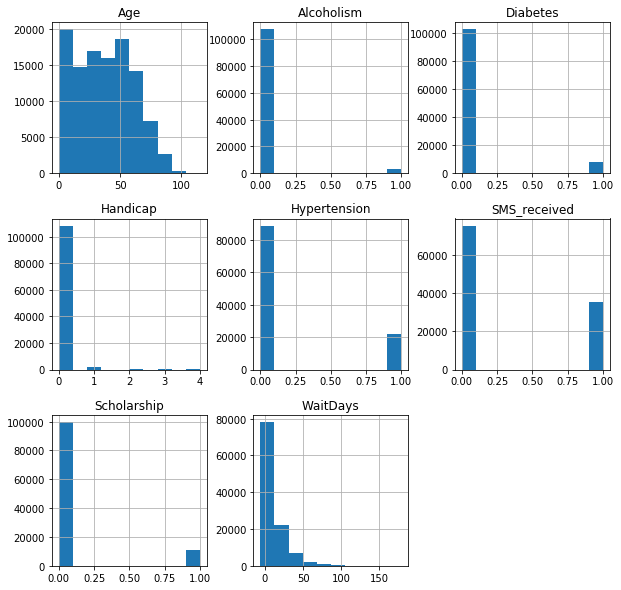

In [17]:
# displays histogram of all numerical values
df.hist(figsize= (10,10));

Histogram distribution of all numerical vaqlues

Text(0,0.5,'Frequency')

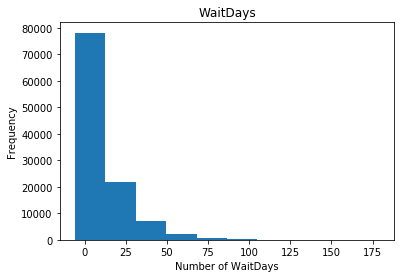

In [20]:
# displays histogram of 'WaitDays'
df['WaitDays'].plot(kind='hist')
plt.title('WaitDays')
plt.xlabel('Number of WaitDays')
plt.ylabel('Frequency')

 The histogram is skewed to the right.

Text(0.5,1,'Correlation between Alcoholism and WaitDays')

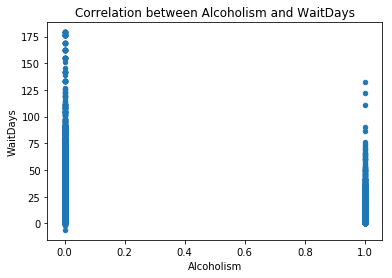

In [21]:
# displays scatterplot between 'Alcoholism' and 'WaitDays'
df.plot(x='Alcoholism', y='WaitDays', kind='scatter');
plt.title('Correlation between Alcoholism and WaitDays')

There is no correlation between alcoholism and waitdays.

Text(0.5,1,'Correlation of WaitDays and Hypertension')

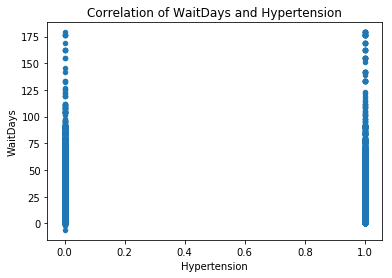

In [22]:
# displays scatterplot between 'Hypertension' and 'WaitDays'
df.plot(x='Hypertension', y='WaitDays', kind='scatter')
plt.title('Correlation of WaitDays and Hypertension')

 There is no correlation between hypertension and waitdays.

Text(0.5,1,'Correlation between Age and WaitDays')

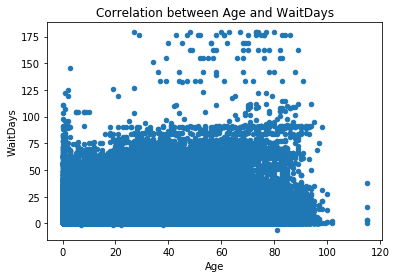

In [23]:
# shows scatterplot
df.plot(x='Age', y='WaitDays', kind='scatter');
plt.title('Correlation between Age and WaitDays')

 There is little to no correlation between waitdays and age as they are not positive or negative.

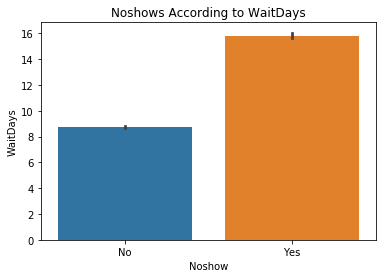

In [24]:
# displays barplot
sns.barplot(x = 'Noshow', y = 'WaitDays', data = df)
plt.title('Noshows According to WaitDays')
plt.show()

The bar for people not showing is relatively higher than people showing up for appointments.

### Does sms recieved affect patient noshow?

Text(0,0.5,'Frequenvy')

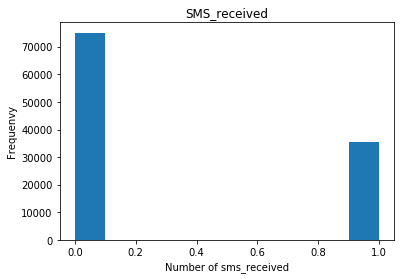

In [25]:
# displays histogarm
df['SMS_received'].plot(kind='hist')
plt.title('SMS_received')
plt.xlabel('Number of sms_received')
plt.ylabel('Frequenvy')

Majority of patients received no sms.

Text(0.5,1,'Correlation between SMS_received and Age')

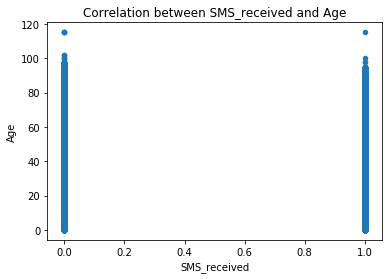

In [26]:
# displays scatterplot for 'SMS_received' and 'Age'
df.plot(x='SMS_received', y='Age', kind='scatter');
plt.title('Correlation between SMS_received and Age')

No correlation between SMS_received and Age

Text(0.5,1,'Correlation between SMS_received and Handicap')

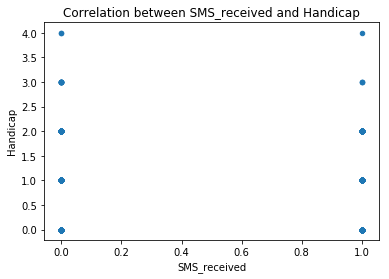

In [27]:
# dislays a scatterplot
df.plot(x='SMS_received', y='Handicap', kind='scatter');
plt.title('Correlation between SMS_received and Handicap')

No correlation between sms received and handicap.

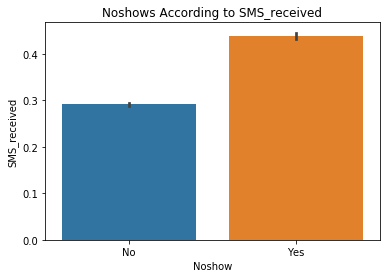

In [28]:
# displays barplot
sns.barplot(x = 'Noshow', y = 'SMS_received', data = df)
plt.title('Noshows According to SMS_received')
plt.show()

There were a lot more noshows regardless of the sms sent.

### Does age affect patient noshow?

Text(0,0.5,'Frequency')

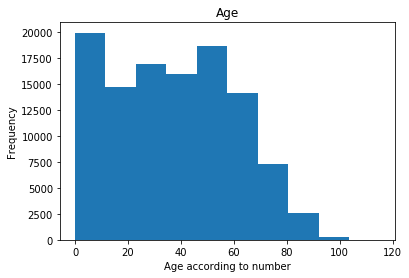

In [29]:
# displays histogram of 'Age'
df['Age'].plot(kind='hist')
plt.title('Age')
plt.xlabel('Age according to number')
plt.ylabel('Frequency')

A little skewed to the right.

Text(0.5,1,'Correlation between Age and Diabetes')

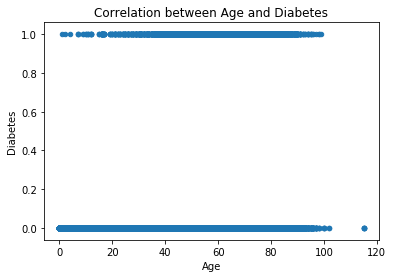

In [30]:
# displays scatterplot 
df.plot(x='Age', y='Diabetes', kind='scatter')
plt.title('Correlation between Age and Diabetes')

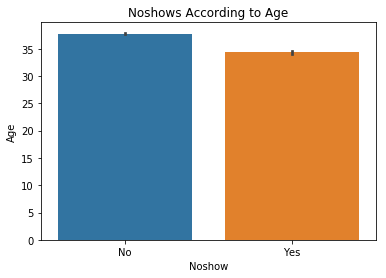

In [31]:
# displays barplot
sns.barplot(x = 'Noshow', y = 'Age', data = df)
plt.title('Noshows According to Age')
plt.show()

The graph shows a higher distribution of patients showing up.

### Exploratory Data Analysis summary
From the explorative data analysis done, we can ascertain that sms received and waitdays play a large part in patients not showing up for appointments. The variables for each of the research questions were compared with other variables to see the correlation.

<a id='conclusions'></a>
## Conclusions
.There are no definite values to determine how much WaitDays, SMS_received and Age affected Noshows. But the exploratory analysis shows that WaitDays, and SMS_received affected whether patients showed up or not.
### Limitations
There were some limitations in the analysis. The datatype of the dates was a problem that I had to correct in order to create the column WaitDays. Also, the noshow column which was an important variable if it had been numerical would have been easier to detect trends between other variables.


In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0